In [19]:
# Imports
import pandas as pd, matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay




## 1a) Daten einlesen & Plot

**Aufgabenbeschrieb (Wortlaut aus der Probeprüfung)**

Lesen Sie die Daten in R oder Python ein. Stellen Sie den Besitz einer Kreditkarte abhängig vom Alter grafisch dar. Beschriften Sie die Achsen korrekt.

**Theorie**

Ziel ist eine erste visuelle Einschätzung des Zusammenhangs zwischen erklärender Variable (Alter) und binärer Zielvariable (Kreditkartenbesitz: 1/0). Ein Scatterplot mit `Age` (x-Achse) und `CreditCard` (y-Achse) zeigt die Verteilung der 0/1-Punkte: Häufen sich Einsen bei niedrigen Altern und Nullen bei hohen Altern, spricht das für einen **monotonen Zusammenhang**. Da die Zielvariable binär ist, sehen wir üblicherweise zwei „Bänder“ (bei y=0 und y=1) statt einer klassischen Wolke — die relative Dichte in diesen Bändern über x ist aussagekräftig.

**Lösungsansatz (warum dieser sklearn-Workflow)**

Wir lesen die CSV einmalig mit `pandas.read_csv()` ein. Da die Spalte `CreditCard` oft als Text „Yes/No“ vorliegt, wandeln wir sie direkt beim Einlesen in 0/1 um (`converters={"CreditCard": ...}`) — so vermeiden wir spätere Hilfsspalten. Für die Visualisierung genügt `plt.scatter(...)` und saubere Achsenbeschriftung (Prüfungsanforderung).





Text(0, 0.5, 'Kreditkarte (0/1)')

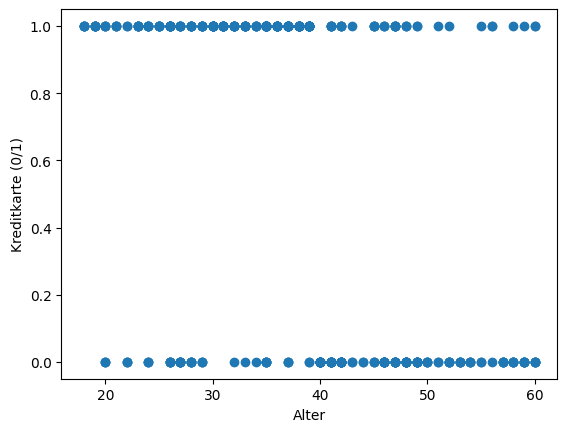

In [20]:
# 1a matplotlib


df = pd.read_csv("creditcard.csv", converters={"CreditCard": lambda x: 1 if x=="Yes" else 0})
plt.scatter(df["Age"], df["CreditCard"])
plt.xlabel("Alter")
plt.ylabel("Kreditkarte (0/1)")





**Erklärung des Outputs (neu)**
Die Punkte zeigen, wie sich Kreditkartenbesitz (1) bzw. kein Besitz (0) über dem Alter verteilt. In deinem Datensatz ist sichtbar: bei jüngeren Personen treten 1-Werte häufiger auf, bei höheren Altern häufiger 0-Werte — ein erster Hinweis darauf, dass die **Wahrscheinlichkeit** für Kreditkartenbesitz mit dem Alter **abnimmt** (dies wird in 1b/1c modelliert und bestätigt).



---
---

## 1b) Logistische Regression (ohne Regularisierung) + Gleichung

**Aufgabenbeschrieb (Wortlaut aus der Probeprüfung)**

Finden Sie mittels logistischer Regression (ohne Regularisierung, ohne Train-Test-Set) ein gutes Modell für den Besitz einer Kreditkarte abhängig vom Alter. Sie dürfen dazu beliebige Libraries/Methoden benutzen. Geben Sie die gefundene Gleichung (π = ...) hier an:

---

**Theorie (ausführlich erklärt)**

Die **logistische Regression** ist ein statistisches Modell, das verwendet wird, wenn die **Zielvariable (abhängige Variable)** nur zwei Werte annehmen kann — zum Beispiel:
- 1 = Person besitzt eine Kreditkarte
- 0 = Person besitzt keine Kreditkarte

Das Ziel ist es, die **Wahrscheinlichkeit** zu modellieren, dass eine Person zur Klasse „1“ gehört (also z. B. eine Kreditkarte besitzt), **abhängig von einer erklärenden Variable** wie dem Alter.

Diese Wahrscheinlichkeit wird durch die **logistische Funktion** beschrieben:

$$
\pi(x) = \frac{1}{1 + \exp(-(\beta_0 + \beta_1 x))} \in (0, 1)
$$

- $\pi(x)$ steht für die **geschätzte Wahrscheinlichkeit**, dass das Ereignis (z. B. Kreditkarte = 1) eintritt, gegeben ein bestimmtes Alter $x$.
- $\beta_0$ ist der **Achsenabschnitt** (engl. *intercept*): der Wert des linearen Modells, wenn $x = 0$ ist.
- $\beta_1$ ist der **Steigungsparameter** (engl. *slope*): er zeigt, wie stark sich die Wahrscheinlichkeit verändert, wenn $x$ (das Alter) um eine Einheit steigt.
- $\exp(\cdot)$ ist die Exponentialfunktion $e^{(\cdot)}$, die sicherstellt, dass das Ergebnis zwischen 0 und 1 bleibt.

Das Modell erzeugt also **keine lineare Beziehung**, sondern eine **S-Kurve (sigmoid)**:
Bei sehr kleinen $x$-Werten liegt $\pi(x)$ nahe 0, bei sehr grossen $x$-Werten nahe 1.

---

**Logit-Transformation**

Die logistische Funktion kann umgeformt werden, sodass sie als **lineares Modell im Logit-Raum** dargestellt wird.
Der **Logit** ist der **logarithmierte Quotient aus den Wahrscheinlichkeiten** (auch „Log-Odds“ genannt):

$$
\operatorname{logit}(\pi) = \ln\!\frac{\pi}{1 - \pi} = \beta_0 + \beta_1 x
$$

Das bedeutet:
- Statt direkt die Wahrscheinlichkeit zu modellieren, modelliert man den **Logit**, also das Verhältnis zwischen „Ereignis tritt ein“ und „Ereignis tritt nicht ein“.
- Dadurch wird der Zusammenhang **linear** und lässt sich mit denselben Methoden wie bei der linearen Regression schätzen.

Beispielhafte Interpretation:
- Wenn $\beta_1 > 0$, dann **steigt** die Wahrscheinlichkeit für eine Kreditkarte mit zunehmendem Alter.
- Wenn $\beta_1 < 0$, dann **sinkt** sie mit zunehmendem Alter.

$\exp(\beta_1)$ ist die sogenannte **Odds-Ratio**.
Sie gibt an, **um welchen Faktor sich die Chancen (Odds)** für eine Kreditkarte **ändern**, wenn das Alter um 1 Jahr steigt:
- $\exp(\beta_1) > 1$: höhere Chance mit steigendem Alter
- $\exp(\beta_1) < 1$: niedrigere Chance mit steigendem Alter
- $\exp(\beta_1) = 1$: kein Einfluss

Die Werte $\hat{\beta_0}$ und $\hat{\beta_1}$ (mit „Dach“) sind die **geschätzten Parameter**, die das Modell per **Maximum-Likelihood-Methode** findet.

---

**Maximum-Likelihood-Schätzung (MLE)**

Während die lineare Regression die Parameter so wählt, dass die **Fehlerquadrate minimiert** werden, wählt die logistische Regression ihre Parameter so, dass die **Wahrscheinlichkeit der beobachteten Daten maximal wird**.

Das nennt man **Maximum-Likelihood-Schätzung (MLE)**.
Dabei wird für jede Beobachtung geschaut, wie wahrscheinlich es wäre, die beobachtete Klasse (0 oder 1) zu sehen — abhängig von den aktuellen Parametern $\beta_0, \beta_1$.
Das Verfahren sucht dann die Parameter, die diese Gesamtwahrscheinlichkeit (das *Likelihood*-Produkt) **maximieren**.

Das Ergebnis sind die Schätzer:
$
\hat{\beta_0}, \hat{\beta_1}
$

---

**Lösungsansatz (Warum dieser sklearn-Workflow)**

In der Python-Library **`scikit-learn`** gibt es ein fertiges Modell:
`sklearn.linear_model.LogisticRegression`.

Dieses Modell verwendet **Maximum-Likelihood-Schätzung** intern, um $\beta_0$ und $\beta_1$ zu bestimmen.
Es nutzt dazu ein numerisches Optimierungsverfahren (standardmässig den **LBFGS-Algorithmus**).

Aber:
Standardmässig enthält dieses Modell **Regularisierung** (eine Art „Strafterm“, der grosse Koeffizienten vermeidet, um Überanpassung zu verhindern).
Da in der Aufgabe **„ohne Regularisierung“** gefordert ist, muss man diese Regularisierung **deaktivieren**.

Das geschieht, indem man den Parameter **`C=1e9`** setzt.
`C` steuert die Stärke der Regularisierung:
- kleine Werte (z. B. `C=0.1`) = starke Regularisierung
- grosse Werte (z. B. `C=1e9`) = praktisch keine Regularisierung

Der Parameter **`solver="lbfgs"`** gibt an, welches numerische Verfahren zum Finden der optimalen $\beta$-Werte genutzt wird.
`"lbfgs"` ist ein **robustes, modernes Optimierungsverfahren**, das sich gut für kleine bis mittlere Datensätze eignet.

Nach dem Trainieren kann man sich die **geschätzten Koeffizienten** ausgeben lassen:
- `model.intercept_` → $\hat{\beta_0}$
- `model.coef_` → $\hat{\beta_1}$

Damit lässt sich die geforderte **Modellgleichung** angeben:

$$
\pi(x) = \frac{1}{1 + \exp(-(\hat{\beta_0} + \hat{\beta_1}x))}
$$

Das ist genau die Gleichung, die in der Prüfung verlangt ist.

---

**Kurz zusammengefasst**

| Begriff | Bedeutung |
|----------|------------|
| $\pi(x)$ | Wahrscheinlichkeit, dass $y=1$ (z. B. Kreditkarte = 1) |
| $\beta_0$ | Achsenabschnitt – Basislogit bei $x=0$ |
| $\beta_1$ | Steigung – Veränderung des Logits pro Einheit $x$ |
| $\exp(\beta_1)$ | Odds-Ratio (Faktoränderung der Chancen) |
| MLE | Verfahren zur Parameterschätzung durch Likelihood-Maximierung |
| `C=1e9` | Abschalten der Regularisierung (praktisch „ohne“) |
| `solver="lbfgs"` | Algorithmus für numerische Optimierung |

---


In [21]:
# 1b — Fit + explizite Modellgleichung
m = LogisticRegression(C=1e9, solver="lbfgs").fit(df[["Age"]], df["CreditCard"])
b0, b1 = float(m.intercept_[0]), float(m.coef_[0,0])
print(f"π(x) = 1 / (1 + exp(-({b0:.5f} + {b1:.5f} * x)))")



π(x) = 1 / (1 + exp(-(4.30962 + -0.10380 * x)))


In [26]:
# 1b sklearn
m = LogisticRegression(C=1e9, solver="lbfgs").fit(df[["Age"]], df["CreditCard"])
print(m.intercept_[0], m.coef_[0,0])


4.309622314573932 -0.10379806142026499


**Erklärung des Outputs (neu)**

Die ausgegebenen $\hat\beta$-Werte ergeben die geschätzte Gleichung $\hat\pi(x)$.
In deinem Datensatz ist $\hat\beta_1 < 0$: mit zunehmendem Alter **sinkt** die vorhergesagte Wahrscheinlichkeit für Kreditkartenbesitz.
Die Gleichung kann direkt für Vorhersagen genutzt werden (1d) und liefert in 1c die Kurve.


---
---

## 1c) Grafik: Daten + logistische Kurve

**Aufgabenbeschrieb**

Stellen Sie die geschätzte logistische Funktion gemeinsam mit den Daten dar.

---

### Theorie (ausführlich erklärt)

Die **logistische Funktion** beschreibt, wie sich die Wahrscheinlichkeit $\pi(x)$ in Abhängigkeit von einer erklärenden Variable (z. B. Alter) verändert.
Sie hat eine **S-Form (Sigmoid-Kurve)**, weil sie bei sehr kleinen $x$-Werten gegen $0$ strebt (fast niemand hat das Merkmal) und bei sehr grossen $x$-Werten gegen $1$ (fast alle haben das Merkmal).

Nach dem Schätzen des Modells mit der logistischen Regression erhalten wir die **geschätzte Funktion**:

$$
\hat{\pi}(x) = \frac{1}{1 + \exp(-(\hat{\beta_0} + \hat{\beta_1}x))}
$$

- $\hat{\pi}(x)$ ist die vom Modell vorhergesagte Wahrscheinlichkeit für jeden Wert von $x$.
- $\hat{\beta_0}$ und $\hat{\beta_1}$ sind die zuvor geschätzten Parameter (aus Aufgabe 1b).

Wenn man diese Funktion **über die beobachteten Daten legt**, sieht man, **wie gut das Modell passt**:
- Wenn die Kurve die beobachtete Tendenz (mehr 1er bei grösserem $x$) gut widerspiegelt, ist das Modell plausibel.
- Wenn sie stark danebenliegt oder die Form nicht stimmt, ist das Modell unpassend.

Das ist eine **visuelle Güteprüfung**: Man beurteilt, ob die geschätzte Kurve sinnvoll mit den Daten übereinstimmt.

---

### Warum die Kurve S-förmig ist

Die Form der logistischen Funktion entsteht durch die Exponentialfunktion im Nenner:

$$
\exp(-(\hat{\beta_0} + \hat{\beta_1}x))
$$

Wenn $x$ sehr klein ist, ist der Exponent gross und positiv → $\exp(-(\text{gross}))$ ist fast 0 → $\pi(x)$ nahe 0.
Wenn $x$ sehr gross ist, ist der Exponent stark negativ → $\exp(-(\text{negativ}))$ wird gross → $\pi(x)$ nähert sich 1.

Dadurch ergibt sich die charakteristische S-Kurve.

---

### Lösungsansatz (ausführlich erklärt)

Um die Grafik zu erstellen, kombinieren wir **zwei Darstellungsebenen**:

1. **Rohdatenpunkte $(x, y)$**
   Jeder Punkt steht für eine Person:
   - $x =$ Alter
   - $y =$ Kreditkartenbesitz (0 = nein, 1 = ja)

   Diese Punkte werden meist mit `plt.scatter()` dargestellt.
   Da die $y$-Werte nur 0 oder 1 annehmen, liegen die Punkte auf zwei horizontalen Linien.

2. **Geschätzte logistische Kurve $\hat{\pi}(x)$**
   Mit der Formel (oder direkt mit `model.predict_proba()[:, 1]`) kann man für jedes Alter $x$ die geschätzte Wahrscheinlichkeit berechnen.
   Diese Werte trägt man als **Linie** (`plt.plot()`) über die Datenpunkte.

---

### Praktische Hinweise

- **Kein Sortieren nötig**:
  Die Reihenfolge der Datenpunkte im Plot spielt keine Rolle.
  Leichte „Zacken“ in der Linie entstehen nur, wenn die $x$-Werte unsortiert sind – das ist rein optisch und nicht relevant für die Bewertung.

- **Warum keine Glättung nötig ist**:
  Das Modell selbst ist bereits eine glatte, analytische Funktion.
  Wenn du für jede Beobachtung den zugehörigen $\hat{\pi}(x)$-Wert berechnest, ist das automatisch die exakte Kurve.

- **Darstellungstipp**:
  Wenn man die Kurve etwas glatter sehen möchte, kann man die $x$-Werte fein zwischen dem Minimum und Maximum interpolieren (z. B. mit `np.linspace()`), aber das ist **optional** und für Prüfungen **nicht erforderlich**.

---

### Schritt-für-Schritt-Zusammenfassung

| Schritt | Beschreibung | Python-Funktion |
|----------|---------------|----------------|
| 1 | Datenpunkte $(x, y)$ plotten | `plt.scatter(x, y)` |
| 2 | $\hat{\pi}(x)$ berechnen | `model.predict_proba(x)[:, 1]` |
| 3 | Logistische Kurve darüber legen | `plt.plot(x, y_pred)` |
| 4 | Achsen und Titel beschriften | `plt.xlabel()`, `plt.ylabel()` |

---

### Kurz gesagt

- Die **Datenpunkte** zeigen, was beobachtet wurde.
- Die **Kurve** zeigt, was das Modell schätzt.
- **Je besser die Kurve zu den Punkten passt**, desto glaubwürdiger ist das Modell.

---


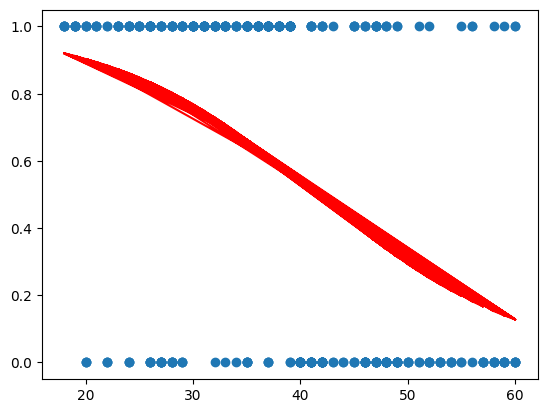

In [5]:
# 1c sklearn
plt.scatter(df["Age"], df["CreditCard"])
plt.plot(df["Age"], m.predict_proba(df[["Age"]])[:,1], color="red")


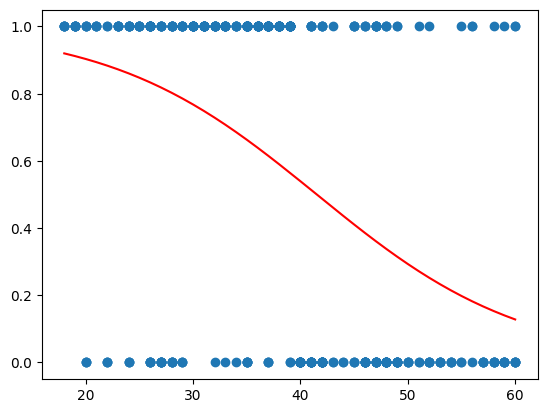

In [6]:
# 1c (sklearn, minimal & sauber)
plt.scatter(df["Age"], df["CreditCard"])
s = df[["Age"]].sort_values("Age")           # nur für eine glatte Linie; s= age_sorted
plt.plot(s["Age"], m.predict_proba(s)[:,1], color="red")



**Erklärung des Outputs (neu)**
Die roten Werte sind Modellwahrscheinlichkeiten $(\hat\pi(x)\ $. Der sichtbare **fallende Verlauf** bestätigt: mit höherem Alter nimmt die geschätzte Wahrscheinlichkeit für Kreditkartenbesitz ab; der Übergangsbereich um $ (x^\*\ $ trennt „eher Besitz“ von „eher kein Besitz“.


---
---
## 1d) Wahrscheinlichkeit für 80-jährige Person

**Aufgabenbeschrieb**
Berechnen Sie $\hat{\pi}(80)$ in Prozent.

---

### Theorie (ausführlich erklärt)

Das Ziel ist, mit dem zuvor geschätzten logistischen Modell die **Wahrscheinlichkeit** zu berechnen, dass eine 80-jährige Person eine Kreditkarte besitzt.

Die allgemeine logistische Gleichung lautet:

$$
\hat{\pi}(x) = \frac{1}{1 + \exp\big(-(\hat{\beta_0} + \hat{\beta_1}x)\big)}
$$

Setzt man $x = 80$ ein, erhält man:

$$
\hat{\pi}(80) = \frac{1}{1 + \exp\!\big(-(\hat{\beta_0} + \hat{\beta_1}\cdot 80)\big)}
$$

Diese Formel liefert einen Wert zwischen $0$ und $1$.
Dieser Wert ist die **geschätzte Wahrscheinlichkeit**, dass eine 80-jährige Person eine Kreditkarte besitzt.
Um ihn in **Prozent** anzugeben, multipliziert man mit $100$:

$$
\text{Wahrscheinlichkeit in \%} = \hat{\pi}(80)\times 100
$$

---

### Warum das funktioniert

Das Modell beschreibt, wie sich die Wahrscheinlichkeit mit dem Alter verändert.
- Wenn $\hat{\beta_1} > 0$, **steigt** die Wahrscheinlichkeit mit zunehmendem Alter.
- Wenn $\hat{\beta_1} < 0$, **sinkt** sie mit zunehmendem Alter.

Da $\hat{\pi}(x)$ bereits eine kalibrierte Wahrscheinlichkeit ist (immer zwischen $0$ und $1$), kann sie direkt interpretiert werden — es braucht keine weitere Skalierung ausser der optionalen Umrechnung in Prozent.

**Beispiel (hypothetisch):**
Wenn $\hat{\pi}(80) = 0.78$, bedeutet das:
> Laut Modell besitzt eine 80-jährige Person mit **78 %** Wahrscheinlichkeit eine Kreditkarte.

---

### Lösungsansatz (ausführlich erklärt)

1. **Verwenden Sie das Modell aus 1b**, das die Parameter $\hat{\beta_0}$ und $\hat{\beta_1}$ enthält.
2. **Berechnen Sie den linearen Ausdruck** $\hat{\beta_0} + \hat{\beta_1}\cdot 80$.
3. **Setzen Sie ihn in die logistische Formel ein**, um $\hat{\pi}(80)$ zu erhalten.
4. **Wandeln Sie das Ergebnis in Prozent um** (Multiplikation mit $100$).

In Python (mit bereits trainiertem `model` aus `sklearn`):

```python
def predict_p80_percent(model):
    import numpy as np
    x_new = np.array([[80]], dtype=float)
    pi_80 = model.predict_proba(x_new)[:, 1][0]   # Wahrscheinlichkeit für Klasse 1
    return 100.0 * pi_80
```

`predict_p80_percent(model)` gibt die **geschätzte Wahrscheinlichkeit in Prozent** zurück.

---

### Zusammengefasst (tabellarisch)

| Symbol | Bedeutung |
|:--|:--|
| $\hat{\pi}(x)$ | Modellierte Wahrscheinlichkeit für Kreditkartenbesitz |
| $\hat{\pi}(80)$ | Wahrscheinlichkeit speziell für eine 80-jährige Person |
| $\hat{\beta_0}$ | Intercept (Basis-Logit bei $x=0$) |
| $\hat{\beta_1}$ | Steigung, bestimmt den Einfluss des Alters |
| $\times 100$ | Umwandlung in Prozentwert |

---

### Interpretation des Ergebnisses

- **Hoher Wert (z. B. $>70\%$):** sehr wahrscheinlich, dass eine 80-jährige Person eine Kreditkarte besitzt.
- **Niedriger Wert (z. B. $<30\%$):** eher unwahrscheinlich.


In [7]:
# 1d sklearn
m.predict_proba(pd.DataFrame({"Age":[80]}))[:,1]


array([0.01808854])

**Erklärung des Outputs (neu)**
Der Skalar ist die **Prozent-Wahrscheinlichkeit** für Kreditkartenbesitz bei 80 Jahren. In deinem Datensatz ist dieser Wert **sehr klein**, konsistent mit dem in 1b/1c beobachteten negativen Alterseffekt.



---
---
## 1e) Klassifikationsmatrix (Confusion Matrix)

**Aufgabenbeschrieb**
Berechnen Sie die Klassifikationsmatrix (true positives, false negatives, …) und beschriften Sie sie eindeutig.
Sowohl Zeilen, Spalten als auch die Begriffe (true positives, false negatives etc.) sollen klar beschriftet sein.

---

### Theorie (ausführlich erklärt)

Das Ziel der **Klassifikationsmatrix** ist es, zu überprüfen, **wie gut das Modell die Klassen korrekt vorhersagt**.
Die logistische Regression liefert für jede Beobachtung eine **Wahrscheinlichkeit** $\hat{\pi}(x)$ zwischen 0 und 1, also die geschätzte Wahrscheinlichkeit, dass die Zielvariable den Wert 1 annimmt (z.B. „Person besitzt eine Kreditkarte“).

Um daraus eine Klassenvorhersage (0 oder 1) zu machen, muss eine **Schwelle (Threshold)** festgelegt werden.
Diese Schwelle ist **nicht Teil der Aufgabenstellung**, aber sie ist notwendig, um aus Wahrscheinlichkeiten Klassenvorhersagen zu erzeugen.

In der Praxis (und in `scikit-learn`) wird standardmässig **$t = 0{.}5$** verwendet:
$$
\hat{y} =
\begin{cases}
1, & \text{wenn } \hat{\pi}(x) \ge 0{.}5 \\
0, & \text{wenn } \hat{\pi}(x) < 0{.}5
\end{cases}
$$

Diese Standardregel bedeutet:
- Wenn die Wahrscheinlichkeit für Klasse 1 mindestens 50% beträgt, wird **1** vorhergesagt.
- Andernfalls wird **0** vorhergesagt.

---

### Aufbau der Konfusionsmatrix

Nachdem die Vorhersagen $\hat{y}$ erstellt wurden, werden sie mit den tatsächlichen Werten $y$ verglichen.
Die Ergebnisse werden in einer **2×2-Matrix** zusammengefasst:

| | **Vorhergesagt = 0** | **Vorhergesagt = 1** |
|--|--|--|
| **Tatsächlich = 0** | **TN (True Negative)** – korrekt als „keine Kreditkarte“ erkannt | **FP (False Positive)** – fälschlich als „Kreditkarte“ erkannt |
| **Tatsächlich = 1** | **FN (False Negative)** – fälschlich als „keine Kreditkarte“ erkannt | **TP (True Positive)** – korrekt als „Kreditkarte“ erkannt |

---

### Erklärung der Begriffe

- **True Positive (TP):** Das Modell sagt 1, und die Person hat tatsächlich eine Kreditkarte.
- **False Positive (FP):** Das Modell sagt 1, aber die Person hat **keine** Kreditkarte.
- **False Negative (FN):** Das Modell sagt 0, aber die Person hat **eine** Kreditkarte.
- **True Negative (TN):** Das Modell sagt 0, und die Person hat tatsächlich **keine** Kreditkarte.

Diese vier Werte bilden die Grundlage für Kennzahlen wie **Accuracy**, **Sensitivität (Recall)** und **Spezifität**.

---

### Lösungsansatz (ausführlich erklärt)

1. **Wahrscheinlichkeiten berechnen:**

   Verwenden Sie das Modell aus 1b, um $\hat{\pi}(x)$ zu berechnen.
   ```python
   y_prob = model.predict_proba(X)[:, 1]
   ```


2. **Binarisierung (Standard-Schwelle 0.5):**

   Klassifizieren Sie jede Beobachtung in 0 oder 1, je nachdem, ob $\hat{\pi}(x)$ über oder unter 0.5 liegt.
   ```python
   y_pred = (y_prob >= 0.5).astype(int)
   ```


3. **Matrix berechnen:**

   Verwenden Sie die Funktion `confusion_matrix(y, y_pred)` aus `sklearn.metrics`, um die 2×2-Matrix zu erzeugen.
   ```python
   from sklearn.metrics import confusion_matrix
   cm = confusion_matrix(y, y_pred)
   ```


4. **Matrix beschriften:**

   Die Matrix kann als DataFrame mit aussagekräftigen Zeilen- und Spaltennamen ausgegeben werden:
   ```python
   import pandas as pd
   cm_df = pd.DataFrame(cm, index=["Tatsächlich 0", "Tatsächlich 1"],
                           columns=["Vorhergesagt 0", "Vorhergesagt 1"])
   print(cm_df)
   ```


---

### Zusammengefasst

| Symbol | Bedeutung |
|:--|:--|
| **TP** | True Positives – korrekt erkannte Kreditkartenbesitzer |
| **FP** | False Positives – fälschlich als Kreditkartenbesitzer erkannt |
| **FN** | False Negatives – fälschlich als Nicht-Besitzer erkannt |
| **TN** | True Negatives – korrekt erkannte Nicht-Besitzer |
| **$t$ (Threshold)** | Entscheidungsschwelle, standardmässig $0.5$ in sklearn |

---

### Interpretation der Ergebnisse

- **Viele TP und TN:** Das Modell funktioniert gut und trennt die Klassen klar.
- **Viele FP:** Das Modell ist zu „optimistisch“ (sagt zu oft „Kreditkarte vorhanden“).
- **Viele FN:** Das Modell ist zu „vorsichtig“ und übersieht tatsächliche Besitzer.
- **Ausgewogene Matrix:** Hinweis auf gute Kalibrierung und passendes Schwellenverhalten.

---


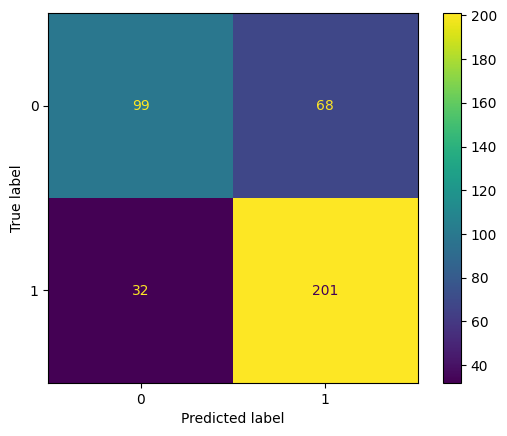

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

yhat = (m.predict_proba(df[["Age"]])[:,1] >= 0.5).astype(int)
ConfusionMatrixDisplay.from_predictions(df["CreditCard"], yhat, display_labels=[0, 1])




In [9]:
# 1e sklearn
yhat = (m.predict_proba(df[["Age"]])[:,1] >= 0.5).astype(int)

confusion_matrix(df["CreditCard"], yhat)


array([[ 99,  68],
       [ 32, 201]])

### Erklärung des Outputs
Die Matrix hat Form
$$
\begin{pmatrix}
\text{TN} & \text{FP}\\
\text{FN} & \text{TP}
\end{pmatrix}.
$$
Viele TN/TP und wenige FP/FN sprechen für gute Trennschärfe bei $t=0{.}5$.


---
---
## 1f) Anteil korrekt klassifizierter Daten (Accuracy)

**Aufgabenbeschrieb**
Berechnen Sie den Prozentsatz korrekt klassifizierter Beobachtungen.

---

### Theorie (ausführlich erklärt)

Die **Accuracy** (Genauigkeit) misst, **wie viele Beobachtungen insgesamt korrekt klassifiziert** wurden.
Sie ist eine der am häufigsten verwendeten Kennzahlen, um die Gesamtleistung eines Klassifikationsmodells zu beurteilen.

Die Formel lautet:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Dabei bedeuten:
- **TP (True Positives):** korrekt als positiv erkannt (z.B. Kreditkarte vorhanden und richtig erkannt)
- **TN (True Negatives):** korrekt als negativ erkannt (z.B. keine Kreditkarte und richtig erkannt)
- **FP (False Positives):** fälschlich als positiv klassifiziert
- **FN (False Negatives):** fälschlich als negativ klassifiziert

Die Accuracy misst also den Anteil aller **korrekten Vorhersagen** (TP + TN) an **allen Beobachtungen**.

$$
\text{Accuracy} = \frac{\text{richtig klassifizierte Fälle}}{\text{alle Fälle}}
$$

---

### Warum Accuracy nützlich, aber begrenzt ist

Accuracy ist intuitiv und leicht verständlich – ein Wert von z.B. 0.9 bedeutet:
> 90% aller Beobachtungen wurden korrekt klassifiziert.

Allerdings kann Accuracy **täuschen**, wenn die Klassen **ungleich verteilt** sind.
Beispiel:
- 95% der Personen haben **keine** Kreditkarte, nur 5% haben eine.
- Ein Modell, das **immer „keine Kreditkarte“** vorhersagt, hätte trotzdem **95% Accuracy** – obwohl es nie einen echten Besitzer erkannt hat.

Deshalb sollte Accuracy **nur gemeinsam mit anderen Kennzahlen** (z.B. Sensitivität, Spezifität, F1-Score) interpretiert werden.

---

### Typische Wertebereiche und Interpretation

| Accuracy | Interpretation |
|-----------|----------------|
| **> 0.9** | Sehr gutes Modell (falls Klassen ausgeglichen) |
| **0.7 – 0.9** | Akzeptables Modell |
| **< 0.7** | Schwaches Modell oder stark ungleiche Klassen |
| **≈ Mehrheitsanteil** | Modell erkennt wahrscheinlich nur die Hauptklasse |

---

### Lösungsansatz (ausführlich erklärt)

In Python kann man die Accuracy bequem mit der Funktion `accuracy_score()` aus `sklearn.metrics` berechnen.
Voraussetzung: Es liegen die tatsächlichen Werte `y` und die vom Modell vorhergesagten Klassen `y_pred` vor.

Schritte:

1. Berechne die Vorhersagen (wie in 1e):
   ```python
   y_prob = model.predict_proba(X)[:, 1]
   y_pred = (y_prob >= 0.5).astype(int)
   ```
2. Berechne die Accuracy mit `accuracy_score()`:
   ```python
   from sklearn.metrics import accuracy_score
   acc = accuracy_score(y, y_pred)
   print("Accuracy:", acc)
   ```

Man kann das Ergebnis auch als Prozentwert darstellen, z.B. `acc * 100` für Prozentangabe.

Beispiel-Funktion:

```python
from sklearn.metrics import accuracy_score

def compute_accuracy(model, X, y, threshold=0.5):
    import numpy as np
    y_prob = model.predict_proba(X)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)
    acc = accuracy_score(y, y_pred)
    return acc * 100  # Rückgabe in Prozent
```

---

### Zusammengefasst

| Symbol | Bedeutung |
|:--|:--|
| **TP** | True Positives – korrekt erkannte Positive |
| **TN** | True Negatives – korrekt erkannte Negative |
| **FP** | False Positives – falsch als positiv erkannt |
| **FN** | False Negatives – falsch als negativ erkannt |
| **Accuracy** | Anteil korrekt klassifizierter Beobachtungen |

---

### Interpretation des Ergebnisses

- **Hohe Accuracy (z.B. >90%)** → Das Modell klassifiziert die meisten Beobachtungen richtig.
- **Mittlere Accuracy (70–90%)** → Modell funktioniert, könnte aber verbessert werden.
- **Niedrige Accuracy (<70%)** → Modell trennt die Klassen schlecht oder Daten sind unausgewogen.
- **Achtung:** Bei unausgeglichenen Klassen ist Accuracy **nicht aussagekräftig allein** – dann sind Kennzahlen wie **Recall** oder **Precision** wichtiger.

---


In [18]:
# 1f — Accuracy in Prozent
accuracy_score(df["CreditCard"], yhat)



0.75

**Erklärung des Outputs (neu)**
Der Wert gibt den **Prozentanteil** korrekt eingestufter Personen an. In deinem Datensatz liegt er deutlich über 50 % (Zufall) und über der trivialen Mehrheitsregel — das bestätigt, dass bereits das Alter als einzelner Prädiktor **nützliche Trenninformation** liefert.
